## Acceso a recursos STAC

In [1]:
# Carga de pystac_client, para acceder datos en STAC
from pystac_client import Client

[Catálogos STAC](https://radiantearth.github.io/stac-browser/#/)

#### Se accede el API de Earth Search, el cual proporciona acceso a conjuntos de datos públicos en Amazon Web Services (AWS).

La función Client.open() retorna un objeto tipo Client, el cual se utiliza para acceder el API (ej. realizar búsquedas).

In [2]:
# URL del API STAC
## el v0 es la versión final del api
api_url = "https://earth-search.aws.element84.com/v0"

# Cliente para acceso a los datos
## permite realizar búsquedas/consultas
client = Client.open(api_url)

In [3]:
# Se accede a una colección 
## definir coleccion, se pueden tener varias
collection = "sentinel-s2-l2a-cogs"

In [4]:
## Buscar imagenes (sea por tiempo, año)
# Punto para búsqueda
from shapely.geometry import Point
point = Point(-84, 10)

In [5]:
# Búsqueda de items (imágenes) que contienen el punto
## criterio collections (busca el de sentinel arriba se definió)
search = client.search(collections=[collection],
                       intersects=point, ## centro del país
                       max_items=10, ## cuantas imaganes como máx
)

In [6]:
# Cantidad total de items que retorna la búsqueda
search.matched()

367

In [9]:
# Items retornados
## Con esto se retornan las imagenes que se solicitaron
items = search.get_all_items()

len(items)

10

In [10]:
# Identificadores de los items retornados
for item in items: 
    print(item)
    

<Item id=S2B_16PHS_20221111_0_L2A>
<Item id=S2A_16PHS_20221106_0_L2A>
<Item id=S2B_16PHS_20221101_0_L2A>
<Item id=S2A_16PHS_20221027_0_L2A>
<Item id=S2B_16PHS_20221022_0_L2A>
<Item id=S2A_16PHS_20221017_0_L2A>
<Item id=S2B_16PHS_20221012_0_L2A>
<Item id=S2A_16PHS_20221007_0_L2A>
<Item id=S2B_16PHS_20221002_0_L2A>
<Item id=S2A_16PHS_20220927_0_L2A>


In [13]:
# Primer item (imagen) retornado
item = items[0]

item.id

'S2B_16PHS_20221111_0_L2A'

In [14]:
item.datetime

datetime.datetime(2022, 11, 11, 16, 10, 31, tzinfo=tzutc())

In [16]:
print(item.datetime)

2022-11-11 16:10:31+00:00


In [17]:
print(item.geometry)

{'type': 'Polygon', 'coordinates': [[[-83.26529071959975, 9.841749072035094], [-84.26505426889273, 9.85133238997552], [-84.2564449365329, 10.843245515578994], [-83.25354975084628, 10.83267581874028], [-83.26529071959975, 9.841749072035094]]]}


In [19]:
print(item.properties) 
## cuando el cloud_cover está en 0, algo dio error, debe estar en true

{'datetime': '2022-11-11T16:10:31Z', 'platform': 'sentinel-2b', 'constellation': 'sentinel-2', 'instruments': ['msi'], 'gsd': 10, 'view:off_nadir': 0, 'proj:epsg': 32616, 'sentinel:utm_zone': 16, 'sentinel:latitude_band': 'P', 'sentinel:grid_square': 'HS', 'sentinel:sequence': '0', 'sentinel:product_id': 'S2B_MSIL2A_20221111T160509_N0400_R054_T16PHS_20221111T194657', 'sentinel:data_coverage': 100, 'eo:cloud_cover': 40.09, 'sentinel:valid_cloud_cover': True, 'sentinel:processing_baseline': '04.00', 'sentinel:boa_offset_applied': True, 'created': '2022-11-12T05:15:06.166Z', 'updated': '2022-11-12T05:15:06.166Z'}


Ahora, se realiza la búsqueda con base en un rectángulo delimitador (bounding box) generado a partir del punto que se definió anteriormente.

In [22]:
# Rectángulo para búsquedas
bbox = point.buffer(0.01).bounds 
bbox

(-84.01, 9.99, -83.99, 10.01)

In [24]:
# Búsqueda con nuevos criterios
## # También se restringe la búsqueda para retornar solo aquellas imágenes con cobertura de nubes menor al 10%
search = client.search(collections=[collection],
                       bbox=bbox,
                       datetime="2022-01-01/2022-10-30",
                       query=["eo:cloud_cover<10"]) # no deben haber espacios alrededor del '<'

# Cantidad total de items que retorna la búsqueda
search.matched()

5

In [25]:
# Items retornados
items = search.get_all_items()

len(items)

5

In [26]:
# Segundo item retornado y algunos de sus atributos
item = items[1]

print(item.datetime)
print(item.properties)

2022-06-04 16:10:32+00:00
{'datetime': '2022-06-04T16:10:32Z', 'platform': 'sentinel-2b', 'constellation': 'sentinel-2', 'instruments': ['msi'], 'gsd': 10, 'view:off_nadir': 0, 'proj:epsg': 32616, 'sentinel:utm_zone': 16, 'sentinel:latitude_band': 'P', 'sentinel:grid_square': 'HS', 'sentinel:sequence': '0', 'sentinel:product_id': 'S2B_MSIL2A_20220604T160509_N0400_R054_T16PHS_20220604T202130', 'sentinel:data_coverage': 100, 'eo:cloud_cover': 5.33, 'sentinel:valid_cloud_cover': True, 'sentinel:processing_baseline': '04.00', 'sentinel:boa_offset_applied': True, 'created': '2022-06-05T01:47:01.875Z', 'updated': '2022-06-05T01:47:01.875Z'}


Pendiente realizar ejercicio

# ASSETS

In [27]:
# Activos (assets) del item
assets = item.assets

# Llaves
assets.keys()

dict_keys(['thumbnail', 'overview', 'info', 'metadata', 'visual', 'B01', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B8A', 'B09', 'B11', 'B12', 'AOT', 'WVP', 'SCL'])

In [28]:
# Contenido completo de los items
assets.items()

dict_items([('thumbnail', <Asset href=https://roda.sentinel-hub.com/sentinel-s2-l1c/tiles/16/P/HS/2022/6/4/0/preview.jpg>), ('overview', <Asset href=https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/16/P/HS/2022/6/S2B_16PHS_20220604_0_L2A/L2A_PVI.tif>), ('info', <Asset href=https://roda.sentinel-hub.com/sentinel-s2-l2a/tiles/16/P/HS/2022/6/4/0/tileInfo.json>), ('metadata', <Asset href=https://roda.sentinel-hub.com/sentinel-s2-l2a/tiles/16/P/HS/2022/6/4/0/metadata.xml>), ('visual', <Asset href=https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/16/P/HS/2022/6/S2B_16PHS_20220604_0_L2A/TCI.tif>), ('B01', <Asset href=https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/16/P/HS/2022/6/S2B_16PHS_20220604_0_L2A/B01.tif>), ('B02', <Asset href=https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/16/P/HS/2022/6/S2B_16PHS_20220604_0_L2A/B02.tif>), ('B03', <Asset href=https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s

In [29]:
# Nombres de los activos
for key, asset in assets.items():
    print(f"{key}: {asset.title}")

thumbnail: Thumbnail
overview: True color image
info: Original JSON metadata
metadata: Original XML metadata
visual: True color image
B01: Band 1 (coastal)
B02: Band 2 (blue)
B03: Band 3 (green)
B04: Band 4 (red)
B05: Band 5
B06: Band 6
B07: Band 7
B08: Band 8 (nir)
B8A: Band 8A
B09: Band 9
B11: Band 11 (swir16)
B12: Band 12 (swir22)
AOT: Aerosol Optical Thickness (AOT)
WVP: Water Vapour (WVP)
SCL: Scene Classification Map (SCL)


In [30]:
# Imagen thumbnail
assets["thumbnail"]

href: https://roda.sentinel-hub.com/sentinel-s2-l1c/tiles/16/P/HS/2022/6/4/0/preview.jpg
Title: Thumbnail
Media type: image/png
Roles: ['thumbnail']
Owner:


In [31]:
# URL del thumbnail
assets["thumbnail"].href

'https://roda.sentinel-hub.com/sentinel-s2-l1c/tiles/16/P/HS/2022/6/4/0/preview.jpg'

## Visualización

In [32]:
# Carga de rioxarray, para graficar datos raster
import rioxarray



El módulo rioxarray provee un conjunto de funciones para manipular imágenes.

Las bandas pueden abrirse con la función open_rasterio() y graficarse con plot() y plot.imshow().

### Visualización del overview

In [33]:
# El overview es una imagen de tres bandas tipo “True Color”.
# Vista general de la imagen (True Color)
## open_rasterio
overview = rioxarray.open_rasterio(item.assets['overview'].href)

overview


<xarray.DataArray (band: 3, y: 343, x: 343)>
[352947 values with dtype=uint8]
Coordinates:
  * band         (band) int32 1 2 3
  * x            (x) float64 8.001e+05 8.005e+05 ... 9.093e+05 9.096e+05
  * y            (y) float64 1.2e+06 1.2e+06 1.199e+06 ... 1.091e+06 1.09e+06
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    _FillValue:          0
    scale_factor:        1.0
    add_offset:          0.0

In [34]:
# Dimensiones de la imagen (bandas, filas, columnas)
overview.shape



(3, 343, 343)

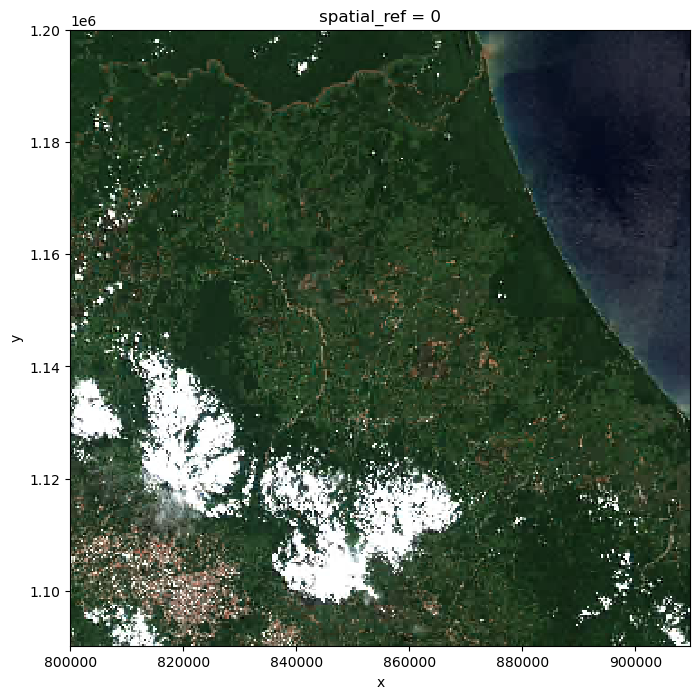

In [35]:
# Graficación de imagen RGB
overview.plot.imshow(figsize=(8, 8))

In [36]:
# Banda 9
b_09 = rioxarray.open_rasterio(assets["B09"].href)

b_09


<xarray.DataArray (band: 1, y: 1830, x: 1830)>
[3348900 values with dtype=uint16]
Coordinates:
  * band         (band) int32 1
  * x            (x) float64 8e+05 8.001e+05 8.001e+05 ... 9.097e+05 9.098e+05
  * y            (y) float64 1.2e+06 1.2e+06 1.2e+06 ... 1.09e+06 1.09e+06
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    _FillValue:          0
    scale_factor:        1.0
    add_offset:          0.0

### Visualización de una banda

In [37]:
# Banda 9
b_09 = rioxarray.open_rasterio(assets["B09"].href)

b_09

<xarray.DataArray (band: 1, y: 1830, x: 1830)>
[3348900 values with dtype=uint16]
Coordinates:
  * band         (band) int32 1
  * x            (x) float64 8e+05 8.001e+05 8.001e+05 ... 9.097e+05 9.098e+05
  * y            (y) float64 1.2e+06 1.2e+06 1.2e+06 ... 1.09e+06 1.09e+06
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    _FillValue:          0
    scale_factor:        1.0
    add_offset:          0.0

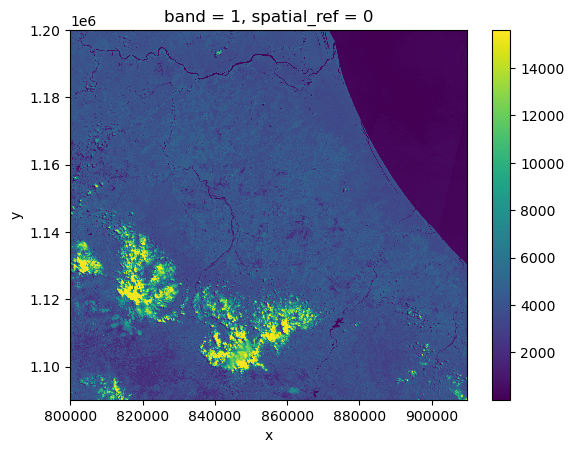

In [38]:
b_09.plot()

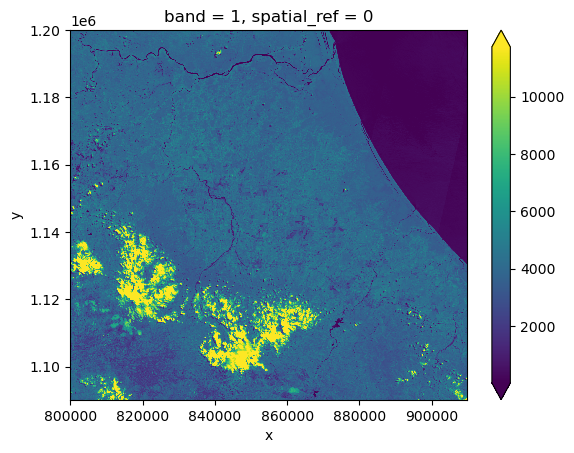

In [39]:
# Graficación de la banda
# robust=True calcula el rango de colores entre los percentiles 2 y 98
b_09.plot(robust=True)

# Cuidado dimensiones GRANDES, puede requierir mucha memoria

In [41]:
# Banda 2
b_02 = rioxarray.open_rasterio(assets["B02"].href)

b_02



<xarray.DataArray (band: 1, y: 10980, x: 10980)>
[120560400 values with dtype=uint16]
Coordinates:
  * band         (band) int32 1
  * x            (x) float64 8e+05 8e+05 8e+05 ... 9.098e+05 9.098e+05 9.098e+05
  * y            (y) float64 1.2e+06 1.2e+06 1.2e+06 ... 1.09e+06 1.09e+06
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    _FillValue:          0
    scale_factor:        1.0
    add_offset:          0.0

## Ejemplo de álgebra raster: cálculo del NDVI

Seguidamente, se utiliza la imagen Sentinel para calcular el Índice de vegetación de diferencia normalizada (NDVI).
Se separan las dos bandas necesarias para el cálculo: la roja y la infrarroja cercana.

In [43]:
# Bandas necesarias para el cálculo
b_red = rioxarray.open_rasterio(assets["B04"].href)
b_nir = rioxarray.open_rasterio(assets["B8A"].href)

Se reduce el área en la que va a realizarse el cálculo.

In [45]:
# Buffer (rectángulo) de 15 km alrededor de un punto
point = Point(859872, 1168852)
bbox = point.buffer(15000).bounds ## (metros)

# Recorte 
b_red_clip = b_red.rio.clip_box(*bbox)
b_nir_clip = b_nir.rio.clip_box(*bbox)

In [47]:
b_red

<xarray.DataArray (band: 1, y: 10980, x: 10980)>
[120560400 values with dtype=uint16]
Coordinates:
  * band         (band) int32 1
  * x            (x) float64 8e+05 8e+05 8e+05 ... 9.098e+05 9.098e+05 9.098e+05
  * y            (y) float64 1.2e+06 1.2e+06 1.2e+06 ... 1.09e+06 1.09e+06
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    _FillValue:          0
    scale_factor:        1.0
    add_offset:          0.0

In [48]:
b_red_clip

<xarray.DataArray (band: 1, y: 3001, x: 3001)>
[9006001 values with dtype=uint16]
Coordinates:
  * band         (band) int32 1
  * x            (x) float64 8.449e+05 8.449e+05 ... 8.749e+05 8.749e+05
  * y            (y) float64 1.184e+06 1.184e+06 ... 1.154e+06 1.154e+06
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    scale_factor:        1.0
    add_offset:          0.0
    _FillValue:          0

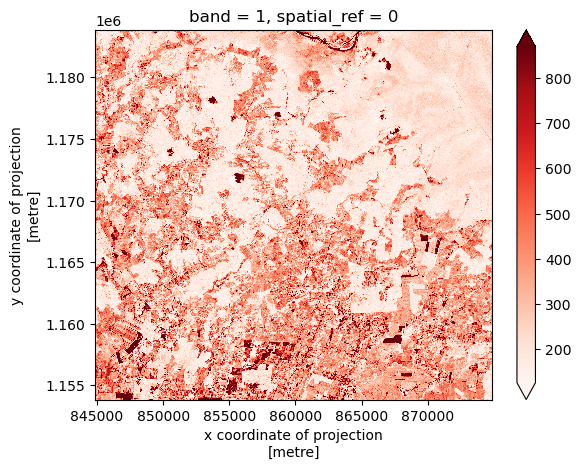

In [49]:
# Visualización de la banda roja
b_red_clip.plot(robust=True, cmap="Reds")

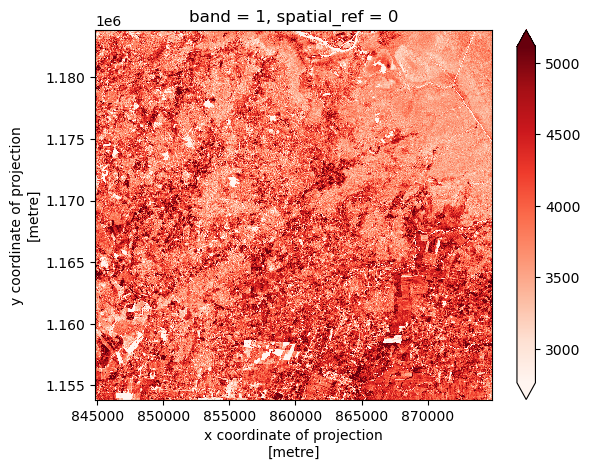

In [50]:
# Visualización de la banda infrarroja cercana
b_nir_clip.plot(robust=True, cmap="Reds")

In [51]:
# Dimensiones de las bandas
print(b_red_clip.shape, b_nir_clip.shape)

(1, 3001, 3001) (1, 1501, 1501)


Para realizar la operación algebraica, las bandas deben tener las mismas dimensiones. Así que se reduce la resolución de la banda roja para hacerla igual a la resolución de la infrarroja cercana.

In [52]:
# Se homogeneizan las dimensiones
b_red_clip_matched = b_red_clip.rio.reproject_match(b_nir_clip)
print(b_red_clip_matched.shape)

(1, 1501, 1501)


Se calcula el NDVI

In [53]:
# Cálculo del NDVI
ndvi = (b_nir_clip - b_red_clip_matched)/ (b_nir_clip + b_red_clip_matched)

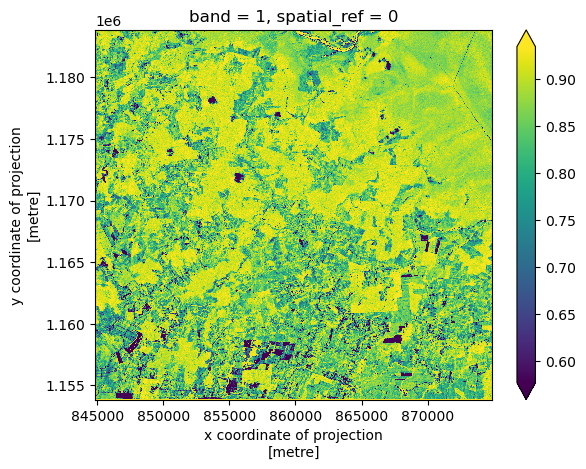

In [56]:
# Visualización del cálculo del NDVI
ndvi.plot(robust=True)
## robust=True calcula el rango de colores entre los percentiles 2 y 9

In [58]:
# Se guarda el resultado del cálculo del NDVI en un archivo

ndvi.rio.to_raster("ndvi.tif")